<ipython-input-4-ed7ef72ec52a>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['close'] = df['close'].fillna(method='ffill').fillna(method='bfill').fillna(0)


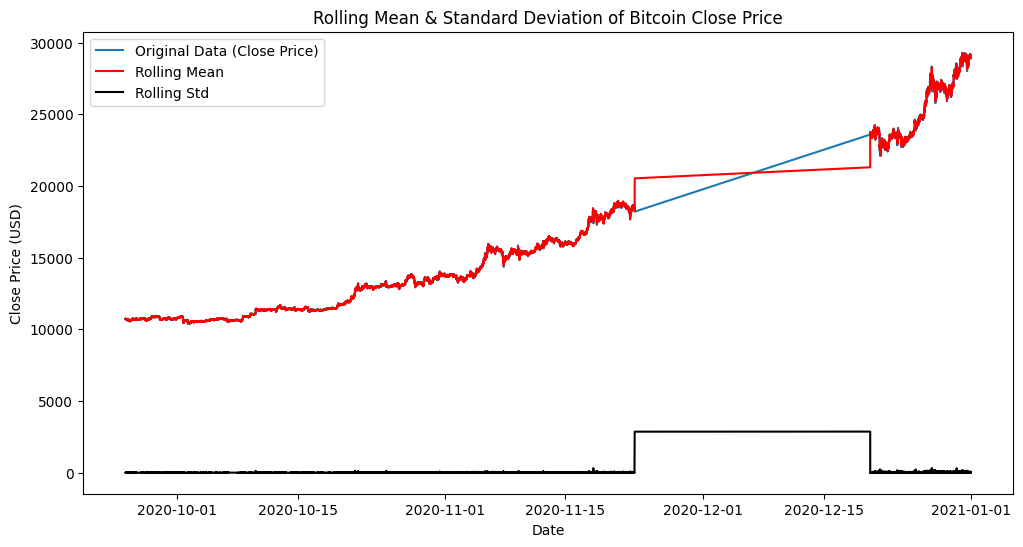


ADF Test Results:
ADF Statistic: -3.1034286884071163
p-value: 0.026300488526705215
Critical Values:
   1%: -3.4304142554011707
   5%: -2.8615683998860826
   10%: -2.5667851162646342
The time series is stationary (reject the null hypothesis).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller  # Corrected import for ADF test

# Load Bitcoin price data
df = pd.read_csv('BTC-2020min.csv')  # Replace with actual file path to your Bitcoin CSV
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select the 'Close' price as our time series
df = df[['close']].copy()  # Focus on the 'Close' price

# Clean data (handle any potential missing values)
df['close'] = df['close'].fillna(method='ffill').fillna(method='bfill').fillna(0)


# Function to perform ADF test and print results
def test_stationarity(timeseries):
    # Perform ADF test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    # Interpret results
    if result[1] < 0.05:
        print("The time series is stationary (reject the null hypothesis).")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis).")


# Plot rolling statistics to visually inspect stationarity
rolling_mean = df['close'].rolling(window=7, center=True).mean()
rolling_std = df['close'].rolling(window=7, center=True).std()

plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Original Data (Close Price)')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation of Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Perform ADF test
print("\nADF Test Results:")
test_stationarity(df['close'])